# DB 구축

In [ ]:
!pip install numpy==1.19.5
!pip install yfinance

     |████████████████████████████████| 6.3MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=fe5ff40ba11074e649d27eca5ded0daf706c55e82600c1abba99f3dc5a28e7b8
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np


[*********************100%***********************]  1 of 1 completed


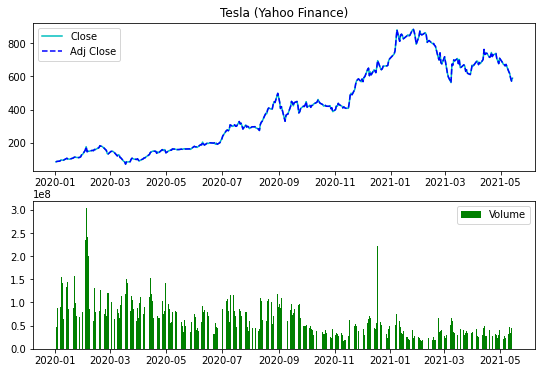

In [33]:
df = pdr.get_data_yahoo('TSLA', '2020-01-01')  # ①

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)  # ② 
plt.title('Tesla (Yahoo Finance)')
plt.plot(df.index, df['Close'], 'c', label='Close')  # ③
plt.plot(df.index, df['Adj Close'], 'b--', label='Adj Close')  # ④
plt.legend(loc='best')
plt.subplot(2, 1, 2)  # ⑤
plt.bar(df.index, df['Volume'], color='g', label='Volume')  # ⑥
plt.legend(loc='best')
plt.show()

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = df[['Open','High','Low','Volume','Close']]
# 스케일 조정 0~1
scaler = MinMaxScaler()
print(scaler.fit(df))
print(scaler.data_max_)
dfx = scaler.transform(df)
dfx = pd.DataFrame(dfx, columns=df.columns, index=list(df.index.values))
dfy = dfx['Close']

MinMaxScaler(copy=True, feature_range=(0, 1))
[8.91380005e+02 9.00400024e+02 8.71599976e+02 3.04694000e+08
 8.83090027e+02]


In [36]:
dfx.head()

,Open,High,Low,Volume,Close
2020-01-02,0.012199,0.006307,0.017767,0.112258,0.017029
2020-01-03,0.016119,0.011994,0.021562,0.254665,0.020174
2020-01-06,0.016111,0.011398,0.022331,0.122635,0.022278
2020-01-07,0.021239,0.016297,0.025664,0.256454,0.026599
2020-01-08,0.024252,0.022853,0.029375,0.485479,0.032292


In [37]:
dfy.head()

2020-01-02    0.017029
2020-01-03    0.020174
2020-01-06    0.022278
2020-01-07    0.026599
2020-01-08    0.032292
Name: Close, dtype: float64

In [39]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 2020-01-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    345 non-null    float64
 1   High    345 non-null    float64
 2   Low     345 non-null    float64
 3   Volume  345 non-null    float64
 4   Close   345 non-null    float64
dtypes: float64(5)
memory usage: 16.2 KB


# 데이터 셋 구축

In [40]:
x = dfx.values.tolist()
y = dfy.values.tolist()

In [41]:
data_x = []
data_y = []
window_size = 10
for i in range(len(y) -window_size):
    _x = x[i:i+window_size]    #다음날 종가(i+windowsize)는 포함되지 않응
    _y = y[i+window_size]      #다음날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.7258953782786941, 0.7743181240710897, 0.7436550477691256, 0.0881709823604156, 0.7858409372820893], [0.7702464155003161, 0.76276131807668, 0.7615714814245478, 0.04104977510591937, 0.7555762787472733], [0.7397971659814006, 0.7352421374720716, 0.7331247623899276, 0.05036190626184005, 0.7416401570918715], [0.7423937990601914, 0.7374997800362687, 0.7451522595396538, 0.023293106943757996, 0.7383596660155829], [0.7420263650882257, 0.7322766632586643, 0.7235177360263384, 0.04361076659472404, 0.729233365584859], [0.7237028851902281, 0.7432355030866149, 0.7362688233415475, 0.028543571220603428, 0.7401232470583852], [0.7226005832743309, 0.7127874204394675, 0.6955825256363771, 0.056071380341601376, 0.6866852134109765], [0.6421782203531807, 0.6664746131128922, 0.6556447957407938, 0.1082634543578819, 0.6720832230499266], [0.6461589170244383, 0.6583103787407684, 0.6446279793610412, 0.06446825493038351, 0.6384023554559729], [0.6449953138151511, 0.6412863683843638, 0.6107913436433319, 0.10025409594

In [42]:
len(data_x)

335

In [43]:
len(data_y)

335

In [44]:
data_x

[[[0.012199303138857961,
   0.0063068373479701345,
   0.017766739131343218,
   0.1122581175486459,
   0.017029125451722874],
  [0.016118754584981645,
   0.011993735432930974,
   0.021562132132441708,
   0.25466513179867256,
   0.020173983227763925],
  [0.01611140964342607,
   0.011398190031346109,
   0.022330689672447612,
   0.12263505474097722,
   0.02227796010150998],
  [0.021238543292879705,
   0.01629672879249361,
   0.02566444364682248,
   0.256454199352551,
   0.02659936971680539],
  [0.02425162334422029,
   0.022852523186504936,
   0.029375004039591354,
   0.4854790228375509,
   0.03229219524684085],
  [0.02998382692461951,
   0.022928190710091334,
   0.030532828263285655,
   0.4387853958208349,
   0.029628306420418443],
  [0.026233402581367554,
   0.019545339389838753,
   0.030739940908262722,
   0.1714458601563949,
   0.028841473322957514],
  [0.029101948013064358,
   0.02947665763504119,
   0.03530639492512909,
   0.4055805783247213,
   0.04036277650163188],
  [0.041536420107

In [45]:
# 훈련용 데이터셋
train_size = int(len(data_x)*0.7)
trainX = np.array(data_x[0:train_size])
trainY = np.array(data_y[0:train_size])

# 테스트용 데이터셋
test_size = len(data_x) - train_size
testX = np.array(data_x[train_size:len(data_x)])
testY = np.array(data_y[train_size:len(data_x)])

In [46]:
type(trainX)

numpy.ndarray


# LSTM 모델 생성하기

In [47]:
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, 5)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=100, batch_size=16)
pred_y = model.predict(testX)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 10, 10)            640       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 2s 7ms/step - loss: 0.1371
Epoch 2/100
15/15 [===================

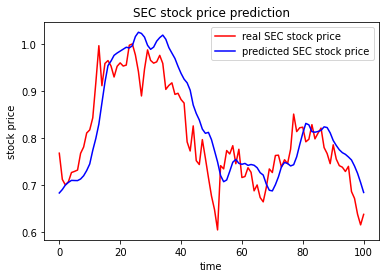

In [48]:
# Visualising the results
plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

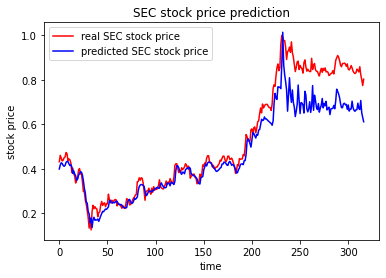

In [ ]:
# Visualising the results
plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [ ]:
len(testY)

317

In [ ]:
len(pred_y)

317

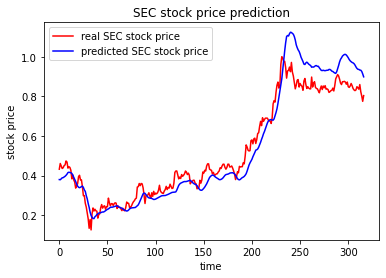

In [ ]:
# Visualising the results
plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [ ]:
pred_y

array([[0.37945545],
       [0.37849772],
       [0.38304245],
       [0.38826597],
       [0.38917115],
       [0.3923663 ],
       [0.3960062 ],
       [0.4008447 ],
       [0.40683484],
       [0.41475463],
       [0.41653085],
       [0.41508564],
       [0.41376293],
       [0.41088507],
       [0.40191603],
       [0.39149803],
       [0.3800138 ],
       [0.36939907],
       [0.35690463],
       [0.3466084 ],
       [0.34064904],
       [0.33842072],
       [0.3404836 ],
       [0.34384543],
       [0.3465013 ],
       [0.339665  ],
       [0.3271161 ],
       [0.31952506],
       [0.2984399 ],
       [0.28212613],
       [0.25884154],
       [0.2392143 ],
       [0.21518952],
       [0.19822548],
       [0.18843728],
       [0.18324868],
       [0.1822454 ],
       [0.19175309],
       [0.1958703 ],
       [0.20240934],
       [0.20637208],
       [0.21013844],
       [0.21148628],
       [0.2119115 ],
       [0.21459976],
       [0.21567193],
       [0.21575405],
       [0.218

In [ ]:
df['Close'].max()

91000.0

In [ ]:
0.89838094 * 91000

81752.66554